# Intro

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# !pip install -U fsds
# !pip install fsds_100719
# !pip install bs_ds
from fsds.imports import *

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import plotly.express as px
# import pandas as pd
# pd.options.plotting.backend = "plotly"

In [3]:
import os,glob
display(os.listdir('zippedData'))

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [4]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [6]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [7]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)#,index_col=0)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


## Final Project Submission

Please fill out:
* Student name: James Irving
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [8]:
# import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

# Preview Data

## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [9]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    try:
        display(data.head(2).style.set_caption(f"{tablename}"))
        print(len(data))
    except:
        display(data.head(2).reset_index().style.set_caption(f"{tablename}"))
    print()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"


146144



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533000,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.700000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734000,2010-03-26,How to Train Your Dragon,7.700000,7610


26517



,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0.000000
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0.000000


331703



,tconst,averagerating,numvotes
0,tt10356526,8.300000,31
1,tt10384606,8.900000,559


73856



,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


606648



,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


54432



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"


146144



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


1560



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


5782



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000000,691300000,2010


3387



,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan


1028186



## Fast Forward

- Used the tmdb api to extract movie info using the ids from the tmdb.movies table

In [10]:
df = pd.read_csv("__api_results_combined.csv",parse_dates=['release_date','release_date_cert'],index_col=0)
df.reset_index(drop=True,inplace=True)
df.head()

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   id                                   1586 non-null   int64              
 1   rating                               1431 non-null   object             
 2   release_date_cert                    1584 non-null   datetime64[ns, UTC]
 3   imdb_id                              1583 non-null   object             
 4   title                                1586 non-null   object             
 5   budget                               1586 non-null   int64              
 6   release_date                         1586 non-null   datetime64[ns]     
 7   revenue                              1586 non-null   int64              
 8   runtime                              1583 non-null   float64            
 9   original_language             

<AxesSubplot:>

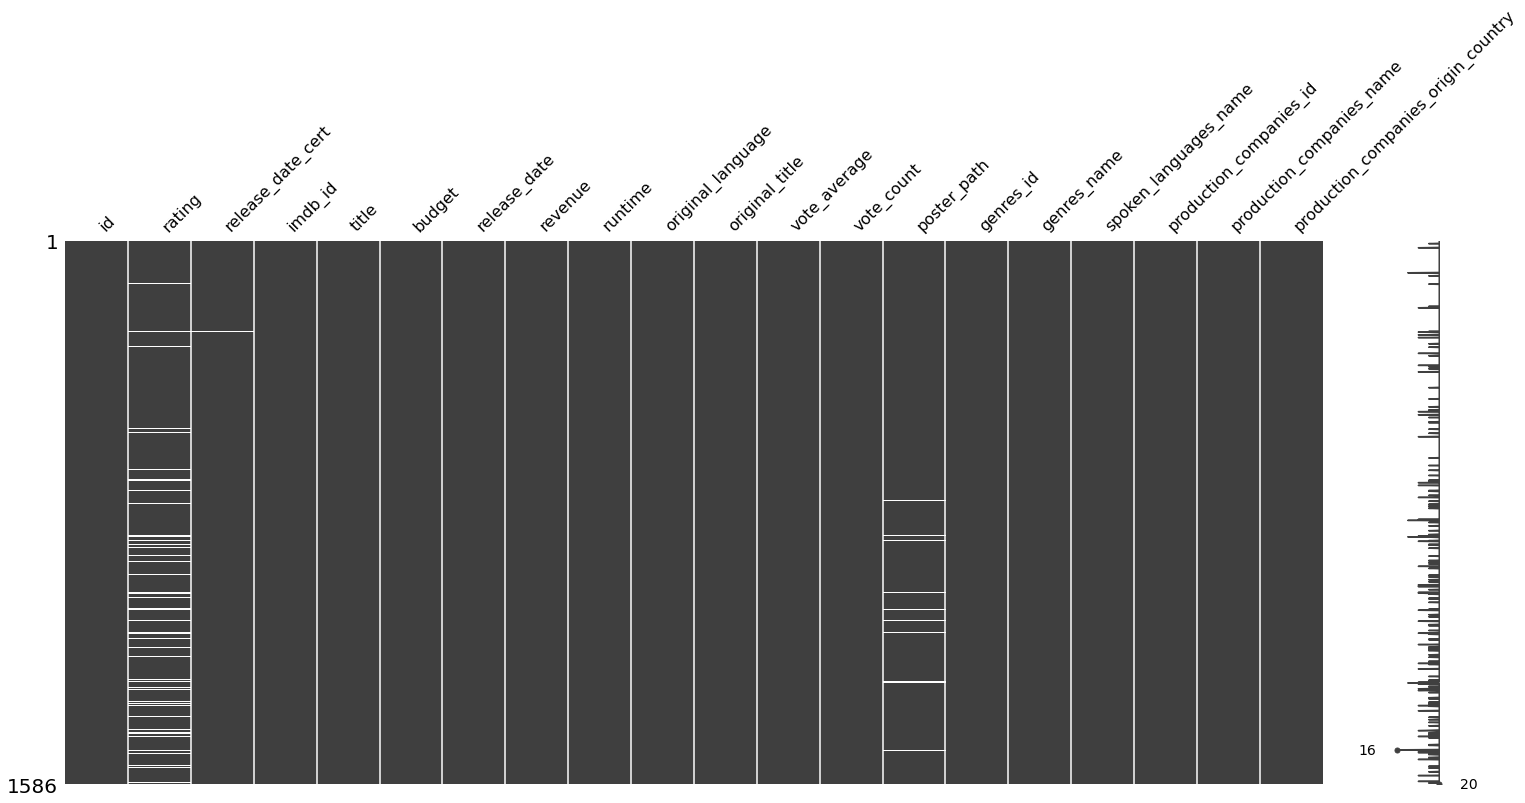

In [12]:
import missingno as ms
ms.matrix(df)

In [13]:
df.isna().sum()

id                                       0
rating                                 155
release_date_cert                        2
imdb_id                                  3
title                                    0
budget                                   0
release_date                             0
revenue                                  0
runtime                                  3
original_language                        0
original_title                           0
vote_average                             0
vote_count                               0
poster_path                             53
genres_id                                0
genres_name                              0
spoken_languages_name                    0
production_companies_id                  0
production_companies_name                0
production_companies_origin_country      0
dtype: int64

In [14]:
df.dropna(subset=['rating','imdb_id'],inplace=True)
df.isna().sum()

id                                     0
rating                                 0
release_date_cert                      0
imdb_id                                0
title                                  0
budget                                 0
release_date                           0
revenue                                0
runtime                                0
original_language                      0
original_title                         0
vote_average                           0
vote_count                             0
poster_path                            8
genres_id                              0
genres_name                            0
spoken_languages_name                  0
production_companies_id                0
production_companies_name              0
production_companies_origin_country    0
dtype: int64

In [15]:
df.reset_index(drop=True,inplace=True)
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1427,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1428,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1429,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


### Restricting Dataset to 2010+


- To provide the most helpful up-to-date recommendations, we are restricting our analysis to movies released after 2010

In [16]:
## Limit to 2010
df = df.loc[df['release_date']>='2010']
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1427,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1428,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1429,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


### Removing Undesirable Ratings

In [17]:
df['rating'].value_counts()
keep_ratings = ['G','PG','PG-13','R']

In [18]:
df = df.loc[df['rating'].isin(keep_ratings)]

In [19]:
df['rating'].value_counts()

R        641
PG-13    529
PG       192
G         16
Name: rating, dtype: int64

In [20]:
def column_report(df1,styled=False,cmap='Reds'):
    """Returns a report of the dtypes, num null, % null, and num of unique values
    """
    report = pd.DataFrame(index=df1.columns)

    report['dtype']=df1.dtypes

    report['num_null'] = df1.isna().sum()
    report['% null'] = round(df1.isna().sum()/len(df1)*100,2)

    report['nunique'] = df1.nunique()
    
    if styled:
        s = report.style.bar('% null').background_gradient(subset=['nunique'],
                                                           cmap=cmap)
        display(s)
    else:
        return report#.style.background_gradient(subset=['num_null'],cmap='Reds')


column_report(df,True)#.style.bar('% null').background_gradient(subset=['nunique'],

,dtype,num_null,% null,nunique
id,int64,0,0.000000,1378
rating,object,0,0.000000,4
release_date_cert,"datetime64[ns, UTC]",0,0.000000,759
imdb_id,object,0,0.000000,1378
title,object,0,0.000000,1378
budget,int64,0,0.000000,210
release_date,datetime64[ns],0,0.000000,1005
revenue,int64,0,0.000000,1210
runtime,float64,0,0.000000,92
original_language,object,0,0.000000,2


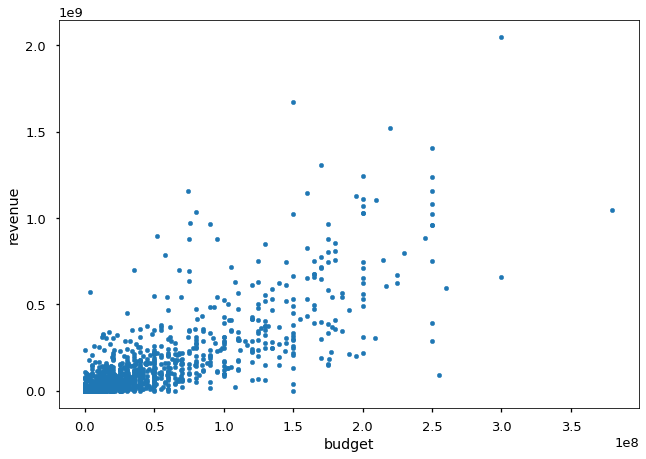

In [21]:
with plt.style.context('seaborn-talk'):

    df.plot(kind='scatter',x='budget',y='revenue')

## Formatting $Millions

In [22]:
# df['revenue'].describe().round(3)

In [23]:
def billions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.1fB' % (x * 1e-9)

def millions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.0f M' % (x * 1e-6)

formatterM = mpl.ticker.FuncFormatter(millions)
formatterB = mpl.ticker.FuncFormatter(billions)

In [24]:
pd.set_option('display.max_columns',0)

#  📕BOOKMARK  START HERE

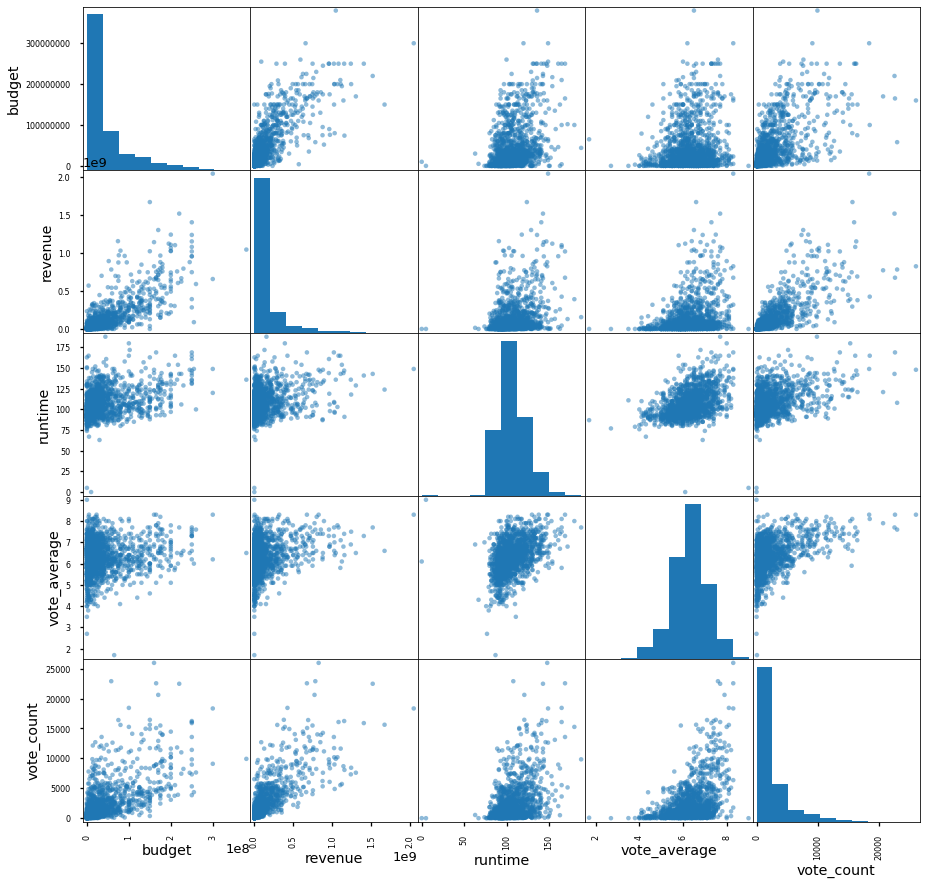

In [25]:
id_cols = ['id','imdb_id','title']

with plt.style.context('seaborn-talk'):

    plt.rcParams['figure.figsize'] = (15,15)
    axes = pd.plotting.scatter_matrix(df.drop(columns=id_cols))#,c='vote_count');

In [26]:
# %conda install -c conda-forge statsmodels

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
df.head()

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"


### Making Modeling Column lists

In [28]:
# making a eyar columns
df['release_year'] = df['release_date_cert'].dt.year

In [29]:
id_cols = ['id','imdb_id','title','original_title']
target = 'revenue'
num_cols = df.drop([*id_cols,target],axis=1).select_dtypes('number').columns
num_cols

Index(['budget', 'runtime', 'vote_average', 'vote_count', 'release_year'], dtype='object')

In [30]:
ohe_cols = ['rating']
ohe_cols

['rating']

In [31]:
str_cols = df.drop([*id_cols,*ohe_cols],axis=1).select_dtypes('object').columns
str_cols

Index(['original_language', 'poster_path', 'genres_id', 'genres_name',
       'spoken_languages_name', 'production_companies_id',
       'production_companies_name', 'production_companies_origin_country'],
      dtype='object')

In [32]:
X = df.drop([*str_cols,*id_cols],axis=1)
X

,rating,release_date_cert,budget,release_date,revenue,runtime,vote_average,vote_count,release_year
0,PG,2013-05-07 00:00:00+00:00,65000000,2012-06-15,73706,87.0,1.7,76,2013
1,R,2015-01-23 00:00:00+00:00,0,2015-06-19,1100000,80.0,6.0,222,2015
2,R,2012-12-21 00:00:00+00:00,25000000,2012-05-22,8784318,137.0,5.6,600,2012
3,PG,2013-12-25 00:00:00+00:00,90000000,2013-12-18,188133322,114.0,7.1,5561,2013
4,R,2014-09-19 00:00:00+00:00,28000000,2014-09-18,53181600,113.0,6.3,1926,2014
...,...,...,...,...,...,...,...,...,...
1426,R,2018-08-10 00:00:00+00:00,15000000,2018-07-30,48686605,135.0,7.6,4633,2018
1427,PG-13,2018-03-28 00:00:00+00:00,5000000,2018-03-23,22525668,108.0,6.8,123,2018
1428,PG-13,2019-03-05 00:00:00+00:00,48000000,2018-11-16,14700000,118.0,7.5,1437,2019
1429,R,2018-09-04 00:00:00+00:00,10000000,2018-06-07,79336821,127.0,7.1,3950,2018


In [33]:
df.drop(id_cols,axis=1)

,rating,release_date_cert,budget,release_date,revenue,runtime,original_language,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year
0,PG,2013-05-07 00:00:00+00:00,65000000,2012-06-15,73706,87.0,en,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013
1,R,2015-01-23 00:00:00+00:00,0,2015-06-19,1100000,80.0,en,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015
2,R,2012-12-21 00:00:00+00:00,25000000,2012-05-22,8784318,137.0,en,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...",2012
3,PG,2013-12-25 00:00:00+00:00,90000000,2013-12-18,188133322,114.0,en,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013
4,R,2014-09-19 00:00:00+00:00,28000000,2014-09-18,53181600,113.0,en,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,R,2018-08-10 00:00:00+00:00,15000000,2018-07-30,48686605,135.0,en,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']",2018
1427,PG-13,2018-03-28 00:00:00+00:00,5000000,2018-03-23,22525668,108.0,en,6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']",2018
1428,PG-13,2019-03-05 00:00:00+00:00,48000000,2018-11-16,14700000,118.0,en,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']",2019
1429,R,2018-09-04 00:00:00+00:00,10000000,2018-06-07,79336821,127.0,en,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018


In [34]:
!pip install -U plotly
import plotly.express as px

Requirement already up-to-date: plotly in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (4.9.0)


In [35]:
import plotly.io as pio
import plotly.graph_objects as go 

In [36]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [37]:
px.scatter(df,'budget','revenue')#,template='ggplot2')

In [38]:
# !pip install -U cufflinks
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

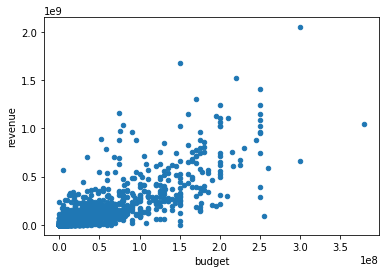

In [39]:
df.plot(kind='scatter',x='budget',y='revenue')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

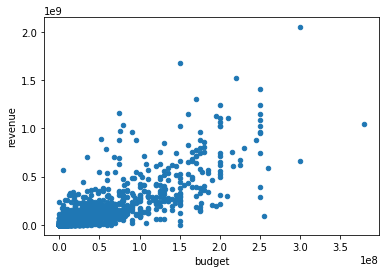

In [40]:
df.plot(x='budget',y='revenue',kind='scatter')

In [41]:
df.describe()

,id,budget,revenue,runtime,vote_average,vote_count,release_year
count,1378.000000,1.378000e+03,1.378000e+03,1378.000000,1378.000000,1378.000000,1378.000000
mean,184204.766328,4.279311e+07,1.329671e+08,107.484761,6.306676,2489.911466,2013.659652
std,133109.656387,5.403868e+07,2.214688e+08,16.997462,0.812966,3284.807945,2.497257
min,189.000000,0.000000e+00,0.000000e+00,0.000000,1.700000,1.000000,2010.000000
25%,62207.250000,7.000000e+06,6.095826e+06,95.000000,5.800000,436.500000,2011.000000
50%,146302.500000,2.300000e+07,4.832215e+07,105.000000,6.300000,1282.500000,2014.000000
75%,295896.250000,5.450000e+07,1.510800e+08,117.000000,6.800000,3156.750000,2016.000000
max,532908.000000,3.800000e+08,2.046240e+09,188.000000,9.000000,25972.000000,2019.000000


In [42]:
drop_cols =[*id_cols, 'release_date_cert','release_date','original_language',*str_cols]

In [43]:
y = df['revenue'].copy()
# X = df.drop(columns=[*drop_cols, 'revenue']).copy()
# X.head() 

In [44]:
# X = pd.get_dummies(df.drop(columns=[*drop_cols, 'revenue']).copy(),columns=ohe_cols)
X =df.drop(columns=[*drop_cols, 'revenue']).copy()
Xy = pd.concat([X,y],axis=1)
Xy

,rating,budget,runtime,vote_average,vote_count,release_year,revenue
0,PG,65000000,87.0,1.7,76,2013,73706
1,R,0,80.0,6.0,222,2015,1100000
2,R,25000000,137.0,5.6,600,2012,8784318
3,PG,90000000,114.0,7.1,5561,2013,188133322
4,R,28000000,113.0,6.3,1926,2014,53181600
...,...,...,...,...,...,...,...
1426,R,15000000,135.0,7.6,4633,2018,48686605
1427,PG-13,5000000,108.0,6.8,123,2018,22525668
1428,PG-13,48000000,118.0,7.5,1437,2019,14700000
1429,R,10000000,127.0,7.1,3950,2018,79336821


In [45]:
formula = f"revenue~budget+runtime+release_year+C(rating)+vote_average+vote_count"

model = smf.ols(formula=formula,data=Xy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     538.1
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:54:03   Log-Likelihood:                -27455.
No. Observations:                1378   AIC:                         5.493e+04
Df Residuals:                    1369   BIC:                         5.497e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.337e+09    2.4e+09     -2.227      0.026      -1e+10   -6.35e+08
C(rating)[T.PG]    -4.091e+07   2.85e+07     -1.436      0.151   -9.68e+07     1.5e+07
C(rating)[T.PG-13] -8.902e+07   2.81e+07     -3.166      0.002   -1.44e+08   -3.39e+07
C(rating)[T.R]     -1.023e+08   2.83e+07     -3.620      0.000   -1.58e+08   -4.69e+07
budget                 1.8595      0.081     22.913      0.000       1.700       2.019
runtime            -5.223e+05   2.14e+05     -2.445      0.015   -9.41e+05   -1.03e+05
release_year        2.714e+06   1.19e+06      2.276      0.023    3.75e+05    5.05e+06
vote_average       -2.506e+06   4.47e+06     -0.560      0.576   -1.13e+07    6.27e+06
vote_count          3.406e+04   1346.959     25.289      0.000    3.14e+04    3.67e+04
==============================================================================
Omnibus:                      794.399   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16098.747
Skew:                           2.260   Prob(JB):                         0.00
Kurtosis:                      19.123   Cond. No.                     5.62e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# model.

In [47]:
revenue_cols = ['revenue','budget']
corr = df.corr()[['revenue']]
corr_tf = corr.apply(lambda x: np.abs(x) > 0.5)

corr.style.background_gradient(cmap='Greens').set_caption('Correlation Matrix')


,revenue
id,-0.062465
budget,0.785052
revenue,1.000000
runtime,0.337446
vote_average,0.282399
vote_count,0.775605
release_year,0.083681


In [48]:
# df1=ratings_api.copy()
# fg = sns.catplot(data=df,x='rating',y='revenue',

In [49]:
# df.set_index('tmdb_id',inplace=True)
# df_api.set_index('id',inplace=True)

# display(df.head(),df_api.head())

In [50]:
# df['rating'] = df_api['rating']
# df

In [51]:
df.groupby('rating').get_group('G')

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year
15,10193,G,2010-06-17 00:00:00+00:00,tt0435761,Toy Story 3,200000000,2010-06-16,1066969703,103.0,en,Toy Story 3,7.8,10198,/a83hHwstUsEEjE55kTgDkZMFweR.jpg,"[16, 10751, 35]","['Animation', 'Family', 'Comedy']","['English', 'Español']",[3],['Pixar'],['US'],2010
46,38843,G,2010-07-23 00:00:00+00:00,tt0493949,Ramona and Beezus,15000000,2010-07-23,27293743,103.0,en,Ramona and Beezus,6.4,540,/r9HUYkHyBgGIgqn9FZKBW4zGsYd.jpg,"[35, 10751]","['Comedy', 'Family']",['English'],"[444, 813]","['Dune Entertainment', 'Di Novi Pictures']","['US', 'US']",2010
234,49013,G,2011-06-16 00:00:00+00:00,tt1216475,Cars 2,200000000,2011-06-11,559852396,106.0,en,Cars 2,5.9,4895,/okIz1HyxeVOMzYwwHUjH2pHi74I.jpg,"[16, 10751, 12, 35]","['Animation', 'Family', 'Adventure', 'Comedy']","['English', '日本語', 'Italiano', 'Français']","[3, 2]","['Pixar', 'Walt Disney Pictures']","['US', 'US']",2011
253,49953,G,2011-03-25 00:00:00+00:00,tt1230204,A Turtle's Tale: Sammy's Adventures,0,2010-08-03,71594792,88.0,en,A Turtle's Tale: Sammy's Adventures,5.8,391,/rKzBoLWJX1Ku2BPiT2OQqoSLBxl.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[1991, 10159, 10160]","['Motion Investment Group', 'nWave Pictures', ...","['BE', 'BE', 'US']",2011
430,46195,G,2011-04-15 00:00:00+00:00,tt1436562,Rio,90000000,2011-04-03,484635760,96.0,en,Rio,6.6,4342,/6qCgledQWttNg3EKpts8RYes74r.jpg,"[16, 12, 35, 10751]","['Animation', 'Adventure', 'Comedy', 'Family']","['English', 'Português']","[9383, 11749, 25]","['Blue Sky Studios', '20th Century Fox Animati...","['US', 'US', 'US']",2011
445,51162,G,2011-07-14 00:00:00+00:00,tt1449283,Winnie the Pooh,30000000,2011-04-13,14460000,63.0,en,Winnie the Pooh,6.9,536,/9T8emBz4BqhahoAuhcOU9X2y0IQ.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[6125, 2]","['Walt Disney Animation Studios', 'Walt Disney...","['US', 'US']",2011
446,62211,G,2013-06-21 00:00:00+00:00,tt1453405,Monsters University,200000000,2013-06-20,743559607,104.0,en,Monsters University,7.0,7423,/y7thwJ7z5Bplv6vwl6RI0yteaDD.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[3, 2]","['Pixar', 'Walt Disney Pictures']","['US', 'US']",2013
471,44010,G,2010-09-10 00:00:00+00:00,tt1483010,Logan,135000,2010-09-10,10474,94.0,en,Logan,6.1,6,NaN,"[35, 18, 10751]","['Comedy', 'Drama', 'Family']",['English'],"[16726, 16727, 16728]","['logan films', 'Real Bean Entertainment', 'Av...","['', '', '']",2010
476,172391,G,2013-12-07 00:00:00+00:00,tt1487931,Khumba,20000000,2013-07-18,27187375,85.0,en,Khumba,5.7,163,/7RXXQxM4ZlmoiqQD053k8GFyegR.jpg,"[16, 12, 10751]","['Animation', 'Adventure', 'Family']",['English'],[23953],['Triggerfish Animation Studios'],['ZA'],2013
477,133931,G,2012-07-07 00:00:00+00:00,tt1488181,Zambezia,20000000,2012-06-05,0,83.0,en,Zambezia,5.7,159,/7aJl440TlbyqthklVrvCnSbjKYe.jpg,"[35, 16, 12, 10751]","['Comedy', 'Animation', 'Adventure', 'Family']",['English'],"[25032, 10884, 25033, 564, 25034, 5113, 23953]","['Cinema Management Group', 'The Department of...","['', '', '', '', '', 'US', 'ZA']",2012


## SAVING FINAL DF

In [52]:
df.to_csv("__FINAL_MOVIES_DATASET.csv",index=False)

In [53]:
df = pd.read_csv('__FINAL_MOVIES_DATASET.csv',
                 parse_dates=['release_date_cert','release_date'])
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...",2012
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']",2018
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']",2018
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']",2019
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018


<AxesSubplot:xlabel='budget', ylabel='revenue'>

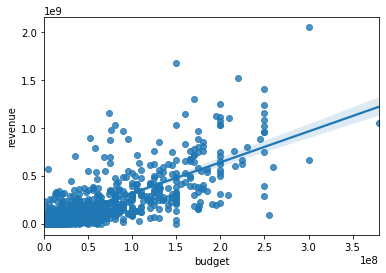

In [54]:
sns.regplot('budget','revenue',data=df)

In [55]:
df.isna().sum()

id                                     0
rating                                 0
release_date_cert                      0
imdb_id                                0
title                                  0
budget                                 0
release_date                           0
revenue                                0
runtime                                0
original_language                      0
original_title                         0
vote_average                           0
vote_count                             0
poster_path                            3
genres_id                              0
genres_name                            0
spoken_languages_name                  0
production_companies_id                0
production_companies_name              0
production_companies_origin_country    0
release_year                           0
dtype: int64

# Q1: Is a higher budget correlated with revenue?

In [56]:
# def millions(x, pos):
#     '''The two args are the value and tick position;
#     From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
#     # Ref https://www.w3schools.com/python/ref_string_format.asp
#     return '$ %1.0fM' % (x * 1e-6)

# formatter = mpl.ticker.FuncFormatter(millions)

In [57]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
plt.style.use('seaborn-poster')

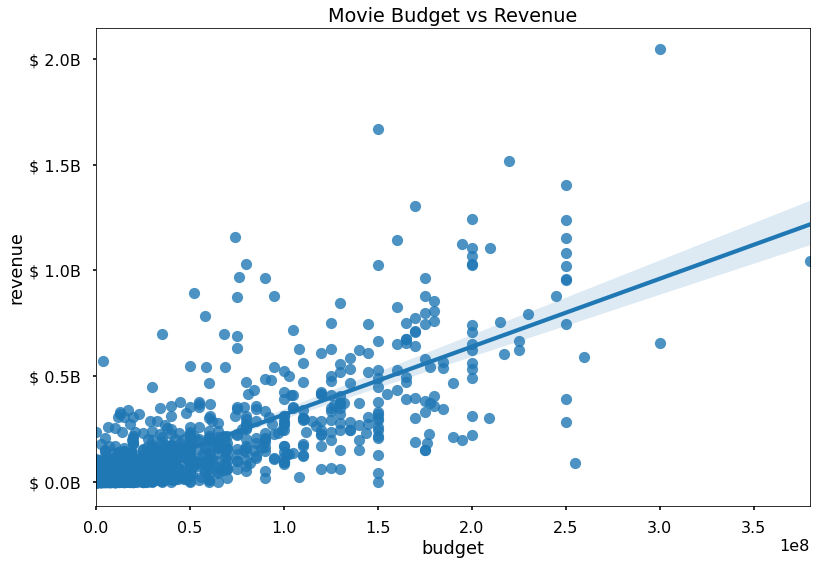

In [59]:
with plt.style.context('seaborn-poster'):
    ax = sns.regplot(data=df,x='budget',y='revenue')
    ax.yaxis.set_major_formatter(formatterB)
    ax.set_title('Movie Budget vs Revenue')

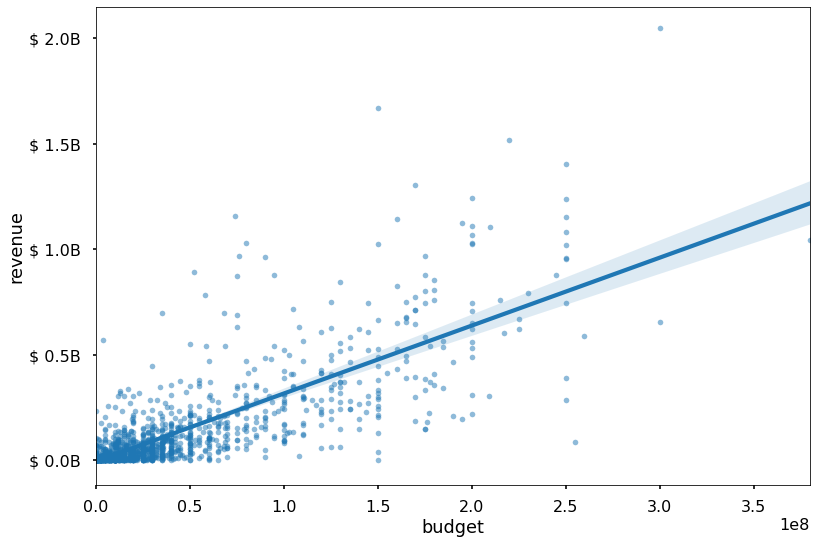

In [60]:
ax = sns.regplot(data=df,x='budget',y='revenue',marker='.',
                 scatter_kws=dict(alpha=0.5))
ax.yaxis.set_major_formatter(formatterB)

<AxesSubplot:xlabel='rating', ylabel='revenue'>

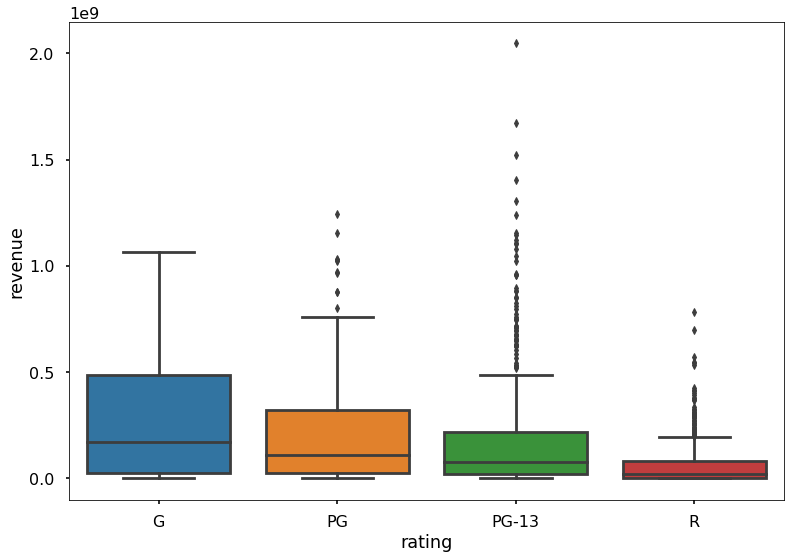

In [61]:
rating_order = ['G','PG','PG-13','R']
sns.boxplot(data=df,x='rating',y='revenue',order=rating_order)

<AxesSubplot:xlabel='rating', ylabel='revenue'>

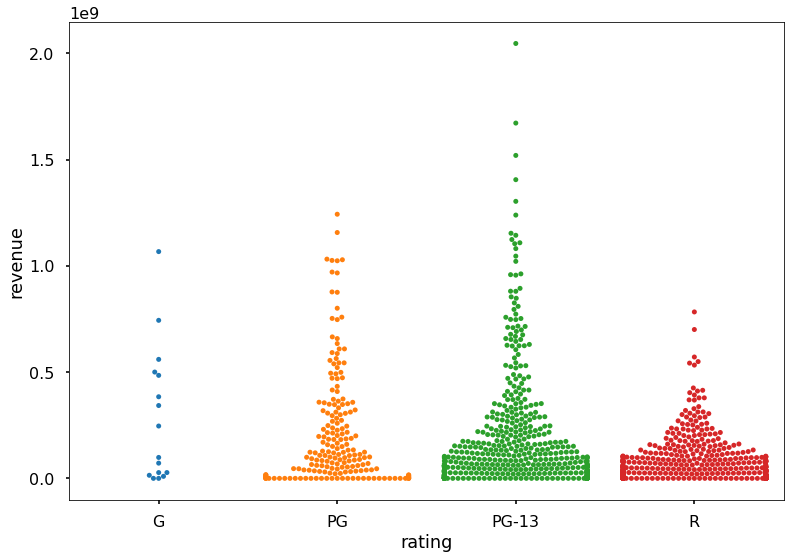

In [62]:
sns.swarmplot(data=df,x='rating',y='revenue',order=rating_order)

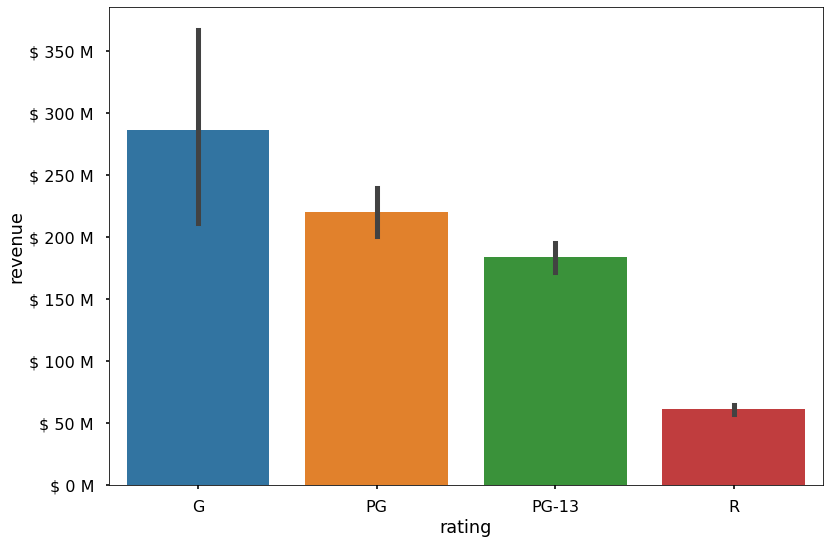

In [63]:
ax = sns.barplot(data=df,x='rating',y='revenue',ci=68,order=rating_order)
ax.yaxis.set_major_formatter(formatterM)

<AxesSubplot:xlabel='rating', ylabel='revenue'>

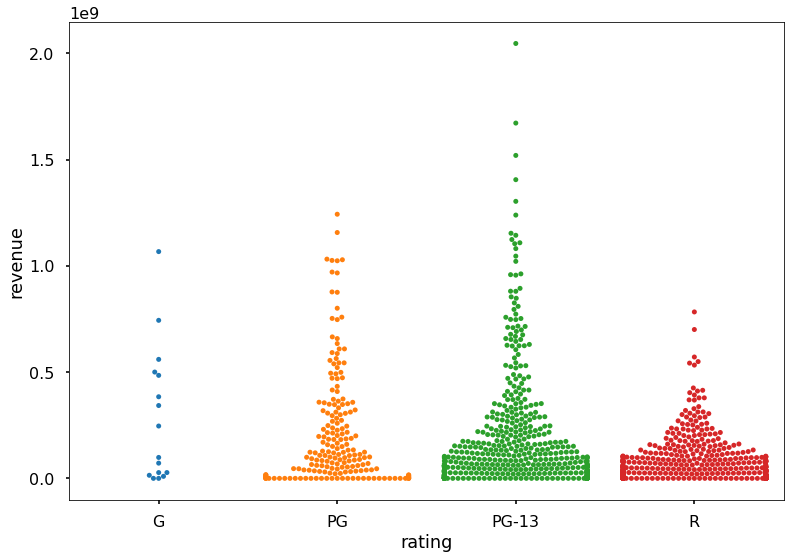

In [64]:
sns.swarmplot(data=df,x='rating',y='revenue',order=rating_order)#,ci=68)

# GENRES

In [65]:
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...",2012
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']",2018
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']",2018
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']",2019
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018


In [66]:
genres_col = df[['genres_name']]
display(genres_col.head(), genres_col.dtypes)

,genres_name
0,"['Animation', 'Action', 'Comedy', 'Family']"
1,"['Mystery', 'Comedy']"
2,"['Adventure', 'Drama']"
3,"['Adventure', 'Comedy', 'Drama', 'Fantasy']"
4,"['Crime', 'Drama', 'Mystery', 'Thriller']"


genres_name    object
dtype: object

In [67]:
ex = df.iloc[0]['genres_name']
ex#.replace()

"['Animation', 'Action', 'Comedy', 'Family']"

In [68]:
def str_to_list(x):
    replace_me = ["[","]","'"," "]
    for char in replace_me:
        x = x.replace(char,'')
    x = x.strip()
    return x.split(',')
    

In [69]:
str_to_list(ex)

['Animation', 'Action', 'Comedy', 'Family']

In [70]:
df['genre'] = df['genres_name'].map(str_to_list)
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year,genre
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,"[Animation, Action, Comedy, Family]"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015,"[Mystery, Comedy]"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...",2012,"[Adventure, Drama]"
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013,"[Adventure, Comedy, Drama, Fantasy]"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']",2014,"[Crime, Drama, Mystery, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']",2018,"[Crime, Drama, History, Comedy]"
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']",2018,[History]
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']",2019,"[Comedy, Drama]"
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018,"[Horror, Mystery, Thriller]"


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   id                                   1378 non-null   int64              
 1   rating                               1378 non-null   object             
 2   release_date_cert                    1378 non-null   datetime64[ns, UTC]
 3   imdb_id                              1378 non-null   object             
 4   title                                1378 non-null   object             
 5   budget                               1378 non-null   int64              
 6   release_date                         1378 non-null   datetime64[ns]     
 7   revenue                              1378 non-null   int64              
 8   runtime                              1378 non-null   float64            
 9   original_language             

In [72]:
df_genre = df.copy()
df_genre = df_genre.explode('genre')
df_genre['genre'].value_counts().sort_index()

                    1
Action            372
Adventure         258
Animation          93
Comedy            471
Crime             187
Documentary        15
Drama             646
Family            159
Fantasy           151
History            60
Horror            170
Music              37
Mystery            96
Romance           179
ScienceFiction    169
Thriller          392
War                34
Western            19
Name: genre, dtype: int64

<AxesSubplot:ylabel='genre'>

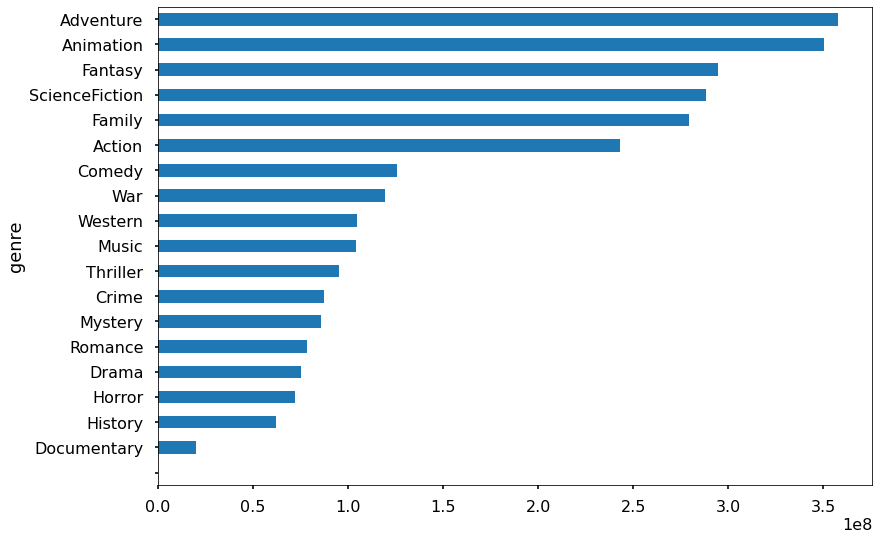

In [73]:
df_genre.groupby('genre').describe()['revenue']['mean'].sort_values().plot(kind='barh')

matplotlib.axes._subplots.AxesSubplot

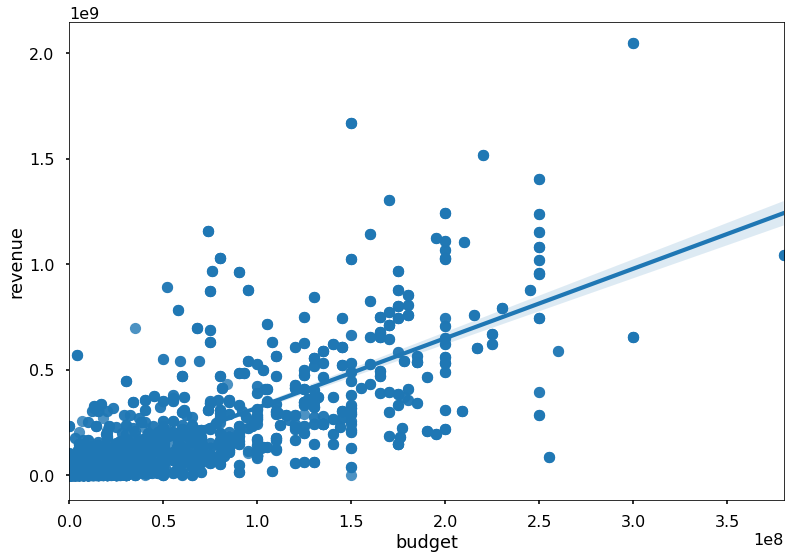

In [74]:
ax = sns.regplot('budget','revenue',df_genre)#,hue='rating',aspect=2,col='rating',col_wrap=2)
type(ax)

Text(0.5, 1.0, 'Example')

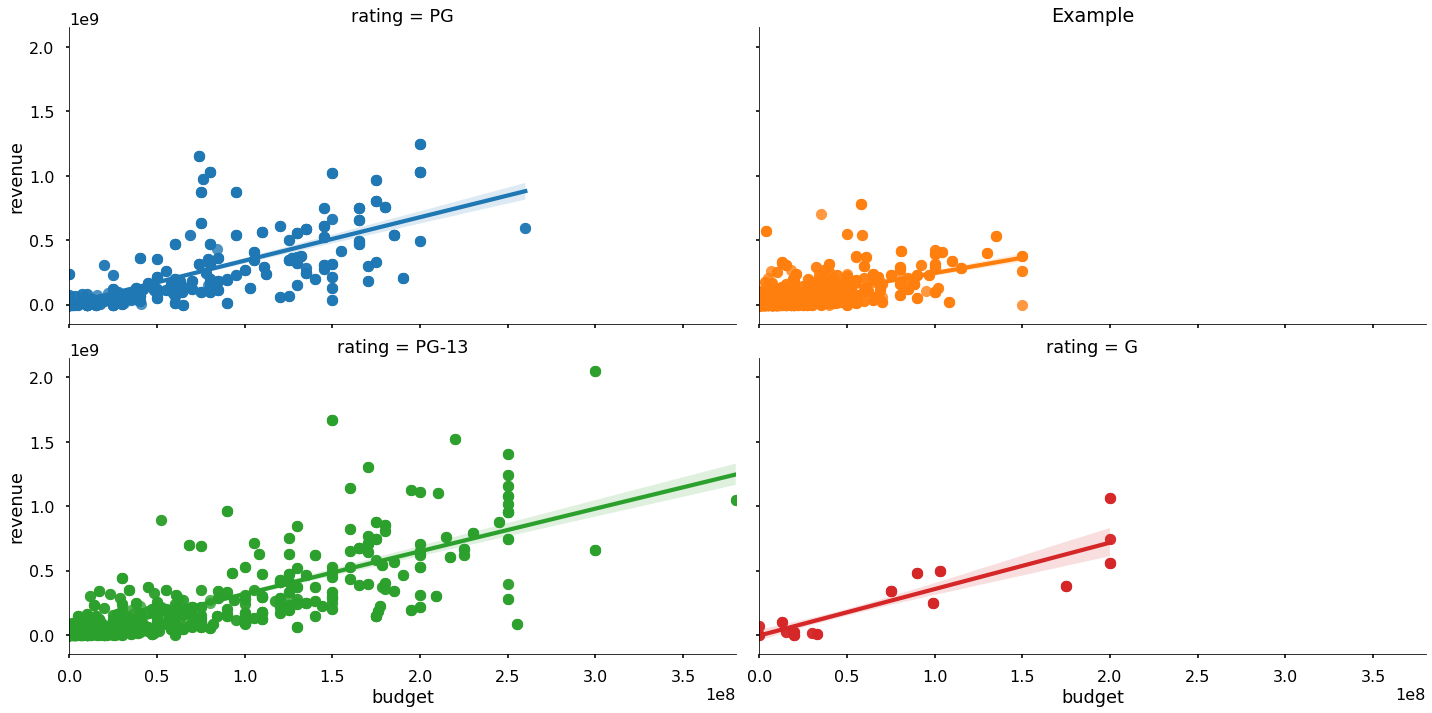

In [75]:
g = sns.lmplot('budget','revenue',df_genre,hue='rating',aspect=2,col='rating',col_wrap=2)
fig = g.fig
axes = fig.get_axes()
len(axes)
axes[1].set_title('Example')

In [76]:
df_genre.corr().style.background_gradient()

,id,budget,revenue,runtime,vote_average,vote_count,release_year
id,1.000000,-0.142520,-0.057089,0.025442,0.087229,-0.043867,0.895642
budget,-0.142520,1.000000,0.782685,0.388783,0.171415,0.635150,0.054595
revenue,-0.057089,0.782685,1.000000,0.334860,0.308377,0.773142,0.096499
runtime,0.025442,0.388783,0.334860,1.000000,0.383094,0.453947,0.128378
vote_average,0.087229,0.171415,0.308377,0.383094,1.000000,0.486170,0.085914
vote_count,-0.043867,0.635150,0.773142,0.453947,0.486170,1.000000,0.092223
release_year,0.895642,0.054595,0.096499,0.128378,0.085914,0.092223,1.000000


<AxesSubplot:>

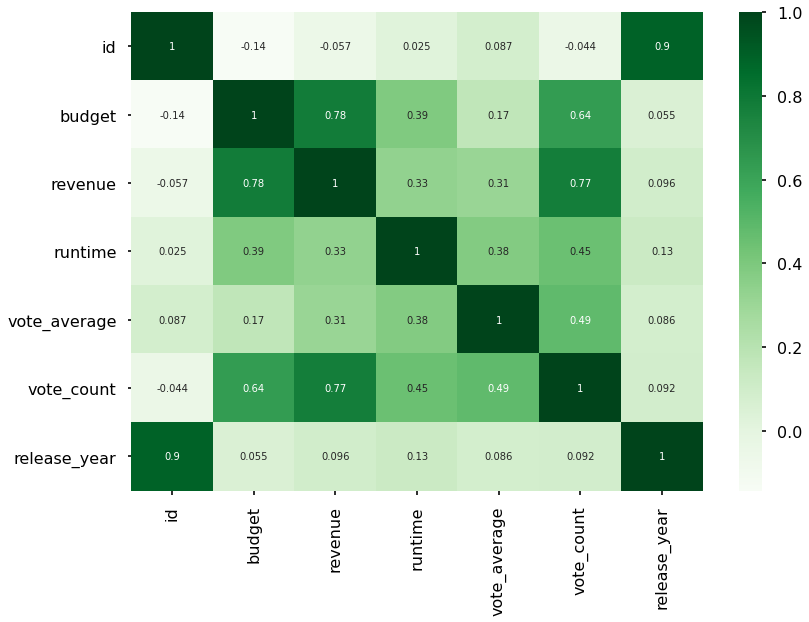

In [77]:
sns.heatmap(df_genre.corr(),cmap='Greens',annot=True)

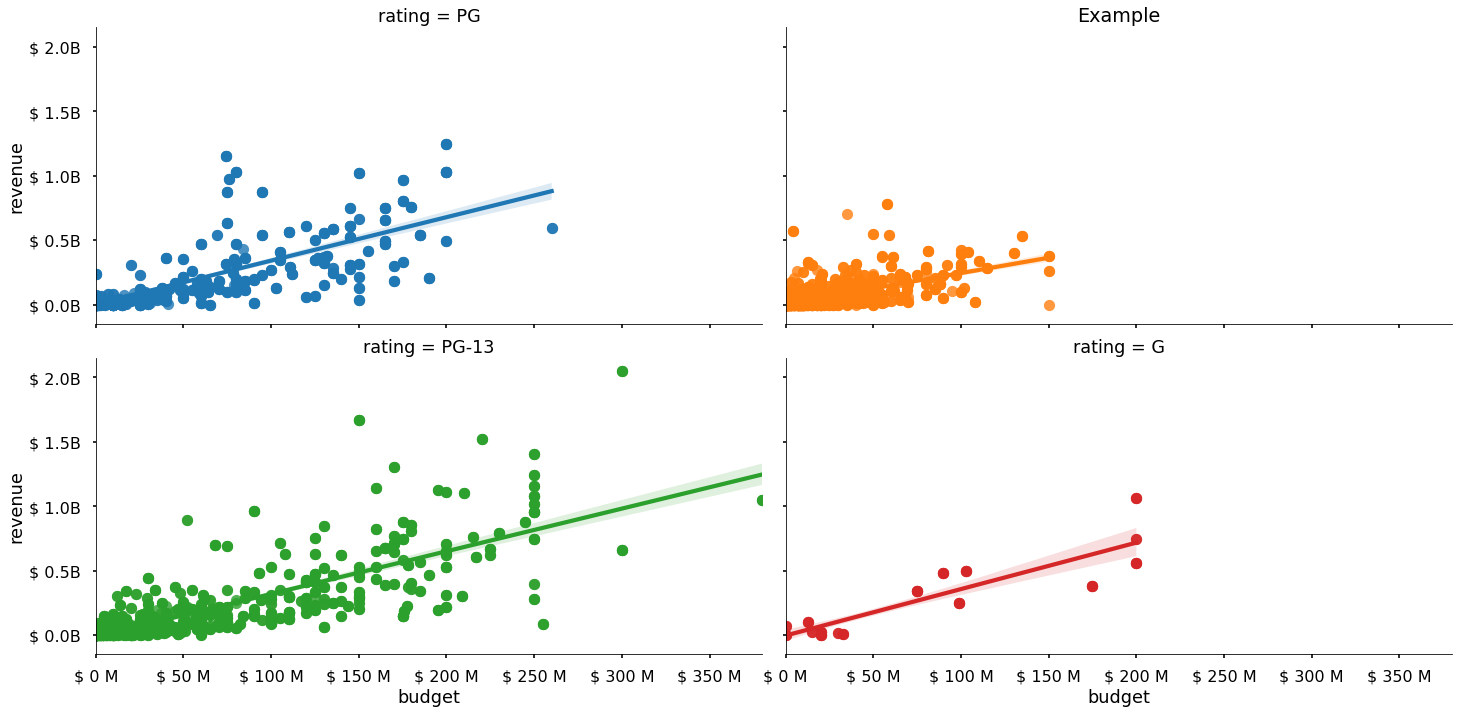

In [78]:
[ax.yaxis.set_major_formatter(formatterB) for ax in axes]
[ax.xaxis.set_major_formatter(formatterM) for ax in axes]

fig

In [79]:
genres = df_genre['genre'].unique()
genres

array(['Animation', 'Action', 'Comedy', 'Family', 'Mystery', 'Adventure',
       'Drama', 'Fantasy', 'Crime', 'Thriller', 'ScienceFiction',
       'Horror', 'History', 'Romance', 'War', 'Documentary', 'Music',
       'Western', ''], dtype=object)

In [80]:
genre_dict={}
for genre in genres:
    genre_dict[genre] = df_genre.groupby('genre').get_group(genre)#['revenue']
    

In [81]:
genre_dict[ "Comedy"]

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year,genre
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,Comedy
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015,Comedy
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013,Comedy
6,23514,R,2011-10-27 00:00:00+00:00,tt0376136,The Rum Diary,45000000,2011-10-13,24000000,120.0,en,The Rum Diary,5.8,752,/8xmzSn5Qd3lX9iqrkoY27wMRE3O.jpg,"[18, 35]","['Drama', 'Comedy']","['Deutsch', 'Español', 'English']","[816, 3281, 2691]","['FilmEngine', 'GK Films', 'Infinitum Nihil']","['', 'GB', 'US']",2011,Comedy
7,76489,PG,2012-04-13 00:00:00+00:00,tt0383010,The Three Stooges,30000000,2012-04-13,54819301,92.0,en,The Three Stooges,5.2,273,/8W1BEP1cRtdgqul9groolv1fgoT.jpg,[35],['Comedy'],['English'],"[8890, 25, 1156, 91002, 444]","['Wessler Entertainment', '20th Century Fox', ...","['', 'US', '', '', 'US']",2012,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,484247,R,2018-09-14 00:00:00+00:00,tt7040874,A Simple Favor,20000000,2018-08-29,97644617,117.0,en,A Simple Favor,6.6,2628,/aIYsjQM0piKc0ibPBCTWv3sqshj.jpg,"[80, 35, 9648, 18, 53]","['Crime', 'Comedy', 'Mystery', 'Drama', 'Thril...",['English'],"[61791, 13240]","['Feigco Entertainment', 'Bron Studios']","['US', 'CA']",2018,Comedy
1371,470333,PG-13,2018-01-26 00:00:00+00:00,tt7158430,Hearts Beat Loud,2000000,2018-06-08,2115765,97.0,en,Hearts Beat Loud,7.2,139,/umiWoEo9aNH2bQnuDZnoFJJxfZn.jpg,"[18, 10402, 35, 10751]","['Drama', 'Music', 'Comedy', 'Family']",['English'],"[18346, 66044, 13466]","['Burn Later Productions', 'Houston King Produ...","['US', 'US', 'US']",2018,Comedy
1372,474335,PG-13,2018-06-29 00:00:00+00:00,tt7334528,Uncle Drew,19000000,2018-06-27,17665000,103.0,en,Uncle Drew,6.6,308,/cDjAlFbpvjuxH4gFD02fqlyk6qL.jpg,[35],['Comedy'],['English'],[1632],['Lionsgate'],['US'],2018,Comedy
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']",2018,Comedy


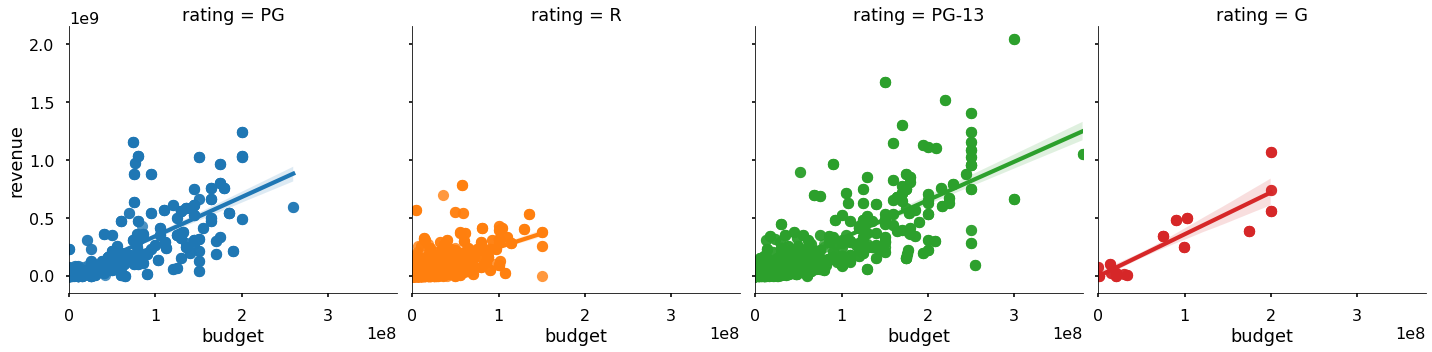

In [82]:
sns.lmplot('budget','revenue',data=df_genre,hue='rating',col='rating')#,hue='')

In [83]:
# sns.jointplot('budget','revenue',df)

# OLD

### Plotly Express

In [92]:
df_genre = df.explode('genre')
df_genre

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year,genre
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,Animation
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,Action
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,Comedy
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,Family
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']",2019,Drama
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018,Horror
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018,Mystery
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US'],2018,Thriller


In [85]:
df.head()

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country,release_year,genre
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']",2013,"[Animation, Action, Comedy, Family]"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']",2015,"[Mystery, Comedy]"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...",2012,"[Adventure, Drama]"
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']",2013,"[Adventure, Comedy, Drama, Fantasy]"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']",2014,"[Crime, Drama, Mystery, Thriller]"


In [100]:
## Visua
import plotly.express as px
px.scatter(df_genre,y='revenue',x='budget',hover_name='title',
           hover_data=['revenue','budget','runtime'],trendline='ols',
          color='runtime')
# px.scatter(df1,y='domestic_gross',
#          x='rating',
#          color='rating')#

In [101]:
# import plotly.express as px
# px.scatter(df1,y='domestic_gross',x='runtime',hover_name='movie',
#            hover_data=['domestic_gross','production_budget'],
#        color='rating',trendline='ols')
# # px.scatter(df1,y='domestic_gross',
# #          x='rating',
# #          color='rating')#

In [102]:
# DATA['tn.movie_budgets']

## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [ ]:
# # keys = list(DATA.keys())

# KEY_COLS = {'imdb.title.crew': 'tconst', 
#         'tmdb.movies': 'id',
#         'imdb.title.akas': 'title_id',
#         'imdb.title.ratings': 'tconst',
#         'imdb.name.basics': 'nconst',
#         'rt.reviews.': 'id',
#         'imdb.title.basics': 'tconst',
#         'rt.movie_info.': 'id',
#         'tn.movie_budgets': 'id',
#         'bom.movie_gross': 'title',
#         'imdb.title.principals': 'tconst'}

In [ ]:
# DATA['imdb.title.principals']

In [ ]:
# unique_tconst = {}
# for table_name,key_col in KEY_COLS.items():
#     table = DATA[table_name]
#     print(table_name)
# #     print(key_col)

#     if 'tconst' in key_col:
#         print(key_col)
#         print()

#         unique_tconst[table_name] = table[key_col].unique()
#     else:
#         print('N/A')
        
#     print()


In [ ]:
# unique_tconst

In [ ]:
[len(v) for x,v in unique_tconst.items()]

In [ ]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

In [ ]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

In [ ]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

In [ ]:
[DATA[x].shape for x in non_matching_key_cols] 

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [ ]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

In [ ]:
df_imdb

In [ ]:
DATA['imdb.title.ratings']

In [ ]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

In [ ]:
df.info()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
scatmat = pd.plotting.scatter_matrix(df);

In [ ]:
import missingno as ms
ms.matrix(df)

In [ ]:
df[df['runtime_minutes'].isna()].isna().sum()

In [ ]:
rated = df[df['averagerating'].notnull()].copy()
rated

In [ ]:
scatmat = pd.plotting.scatter_matrix(rated);

In [ ]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [ ]:
import scipy.stats as st

rated['runtime_minutes']

In [ ]:
rated.isna().sum()/len(rated)

In [ ]:
rated.dropna(inplace=True)

In [ ]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

In [ ]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
rated['outlier'] = idx_outs

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [ ]:
# stop

# Joining dfrt (gross) + df_imdb

In [ ]:
dfrt.head()

In [ ]:
df.head()

# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [ ]:
stop

In [ ]:
df = DATA['tn.movie_budgets']
df

In [ ]:
df['movie']

In [ ]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [ ]:
resp = get_mdb_api('Dark Phoenix')

In [ ]:
make_records_df(resp)

### Testing with 1 Movie

In [ ]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

In [ ]:
test = get_mdb_api(test_movie['movie'])
test

In [ ]:
resp = test.json()
resp

In [ ]:
resp.keys()

In [ ]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

In [ ]:
test_movie.T[0]

In [ ]:
test_movie['movie']

In [ ]:
res_df['Title']

In [ ]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

In [ ]:
test_movie